# 決定木

## (1) 分類木

In [78]:
import pandas as pd
import seaborn as sns

from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

In [79]:
# import dataset(Titanic)
df = sns.load_dataset('titanic')

# split dataset into X and Y
df_X = df[['sex', 'pclass', 'fare']]
df_y = df['survived']

print("X shape: {}".format(df_X.shape))
print(df_y.value_counts())
display(df_X.join(df_y).head())

# create dummy variables
df_X = pd.get_dummies(df_X, drop_first=True)

# split dataset into train and test sets
train_X, test_X, train_y, test_y = train_test_split(df_X, df_y, random_state=1)

X shape: (891, 3)
survived
0    549
1    342
Name: count, dtype: int64


,sex,pclass,fare,survived
0,male,3,7.2500,0
1,female,1,71.2833,1
2,female,3,7.9250,1
3,female,1,53.1000,1
4,male,3,8.0500,0


[Text(0.5, 0.8333333333333334, 'sex_male <= 0.5\ngini = 0.466\nsamples = 668\nvalue = [421, 247]\nclass = y[0]'),
 Text(0.25, 0.5, 'pclass <= 2.5\ngini = 0.398\nsamples = 233\nvalue = [64, 169]\nclass = y[1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.105\nsamples = 126\nvalue = [7, 119]\nclass = y[1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.498\nsamples = 107\nvalue = [57, 50]\nclass = y[0]'),
 Text(0.75, 0.5, 'fare <= 26.269\ngini = 0.294\nsamples = 435\nvalue = [357, 78]\nclass = y[0]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.223\nsamples = 320\nvalue = [279, 41]\nclass = y[0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.436\nsamples = 115\nvalue = [78, 37]\nclass = y[0]')]

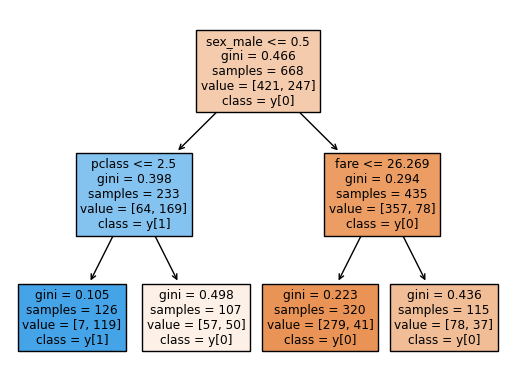

In [80]:
# build model
model = tree.DecisionTreeClassifier(max_depth=2, random_state=1)

# training
model.fit(train_X, train_y)

# validation
model.predict(test_X)
model.score(test_X, test_y) # the mean accurancy

# plot dicision-tree
plot_tree(model, feature_names=train_X.columns, class_names=True, filled=True)

## (2) 回帰木

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# machine learning model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# validation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# datset
from sklearn.datasets import load_breast_cancer

In [82]:
# import datset(Breast Cancer)
dataset = load_breast_cancer()

# split dataset into X and Y
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = pd.Series(dataset.target, name="y")

print("X shape: {}".format(X.shape))
print(y.value_counts())
display(X.join(y).head())

# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

X shape: (569, 30)
y
1    357
0    212
Name: count, dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


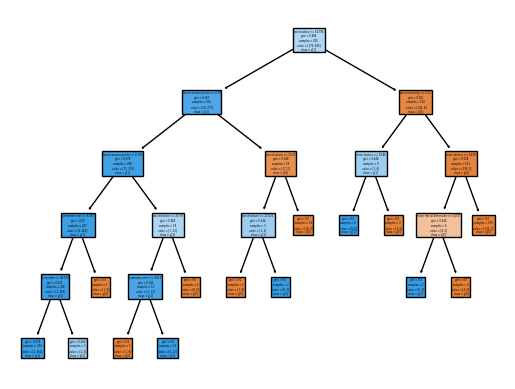

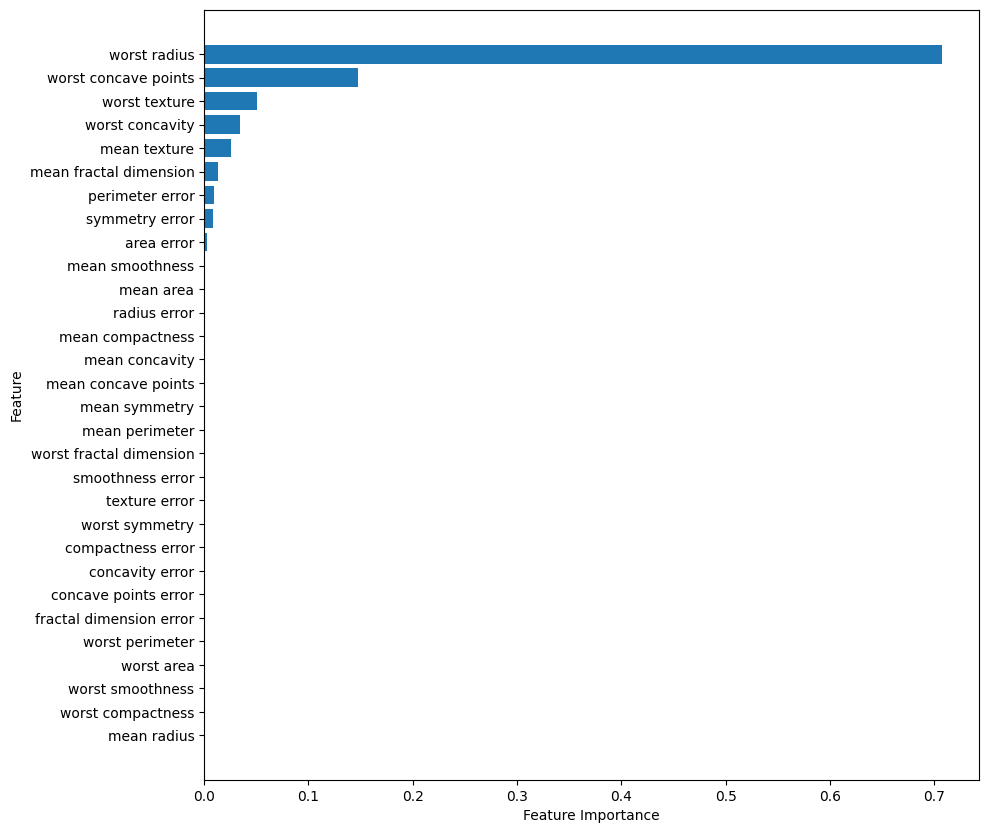

In [83]:
# build model
model = DecisionTreeClassifier(random_state=1, max_depth=5)

# training
model.fit(X_train, y_train)

# validation
model.predict(X_test)
model.score(X_test, y_test)

# plot dicision-tree
plot_tree(model, feature_names=X_test.columns, class_names=True, filled=True)

# visualize feature importance
feature = model.feature_importances_
label = X.columns
indices = np.argsort(feature)

fig = plt.figure(figsize=(10, 10))
plt.barh(range(len(feature)), feature[indices])
plt.yticks(range(len(feature)), label[indices])
plt.xticks()
plt.ylabel("Feature")
plt.xlabel("Feature Importance")
plt.show()